In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [149]:
data=pd.read_csv('titanic.csv')


In [150]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [151]:
data=data.drop(['PassengerId','Name','Cabin'],axis=1)

In [152]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [154]:
data.duplicated().sum()

1

In [155]:
data=data.drop_duplicates()

In [156]:
data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         85
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64

In [157]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
impute=SimpleImputer(strategy='mean')

In [158]:
data['Age']=imputer.fit_transform(data[['Age']]).ravel()
data['Fare']=imputer.fit_transform(data[['Fare']]).ravel()

In [159]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [160]:
data['Family']=data['SibSp']+data['Parch']+1

In [161]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,0,3,male,34.5,0,0,330911,7.8292,Q,1
1,1,3,female,47.0,1,0,363272,7.0000,S,2
2,0,2,male,62.0,0,0,240276,9.6875,Q,1
3,0,3,male,27.0,0,0,315154,8.6625,S,1
4,1,3,female,22.0,1,1,3101298,12.2875,S,3


Text(0, 0.5, 'count')

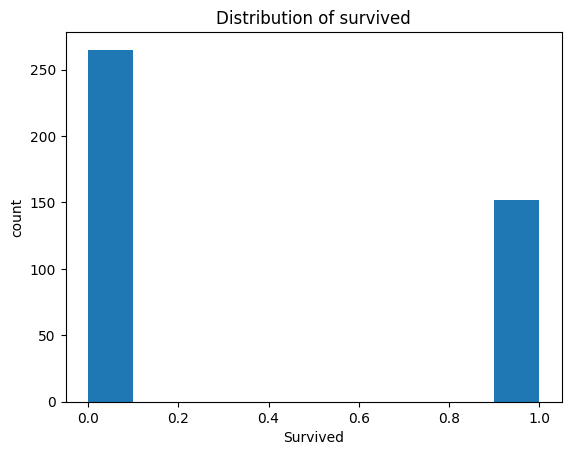

In [162]:
#univariate Analyis
plt.hist(data['Survived'])
plt.title("Distribution of survived")
plt.xlabel("Survived")
plt.ylabel("count")

##Survived passengers is less compared to the other

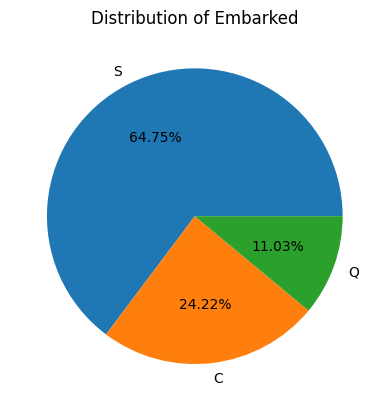

In [163]:
Embarked_count = data['Embarked'].value_counts()
plt.pie(Embarked_count.values, labels=Embarked_count.index, autopct='%1.2f%%')
plt.title("Distribution of Embarked")
plt.show()
##Passengers are more from southhampton

<Axes: xlabel='Sex', ylabel='Count'>

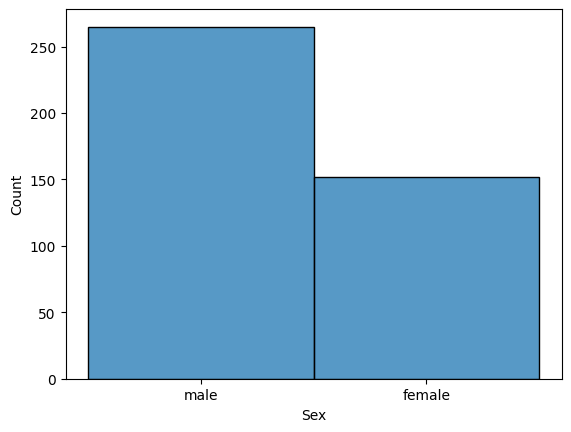

In [164]:
sns.histplot(data,x='Sex')

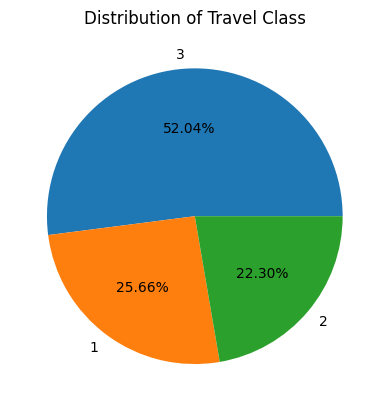

In [165]:
pclass_count = data['Pclass'].value_counts()
plt.pie(pclass_count.values, labels=pclass_count.index, autopct='%1.2f%%')
plt.title('Distribution of Travel Class')
plt.show()

##Passengers are more in third class then first class last second class

Text(0.5, 1.0, 'Distribution of Age')

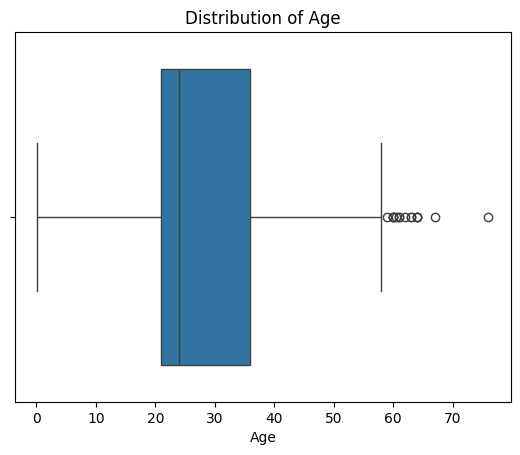

In [166]:
sns.boxplot(data,x='Age')
plt.title("Distribution of Age")

<Axes: xlabel='Sex', ylabel='count'>

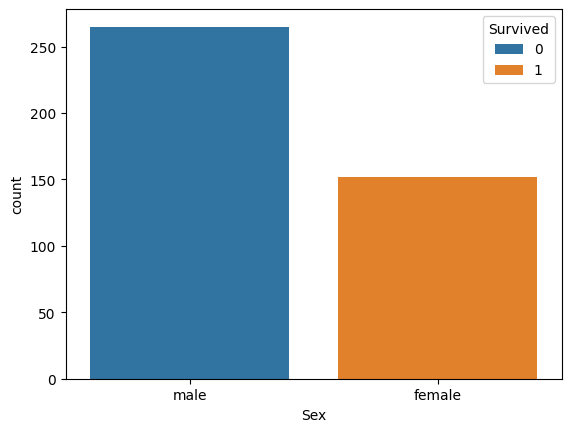

In [167]:
##Bivariate Anlaysis

sns.countplot(data,x='Sex',hue='Survived')
#female survived more than male

Text(0.5, 0, 'Survived')

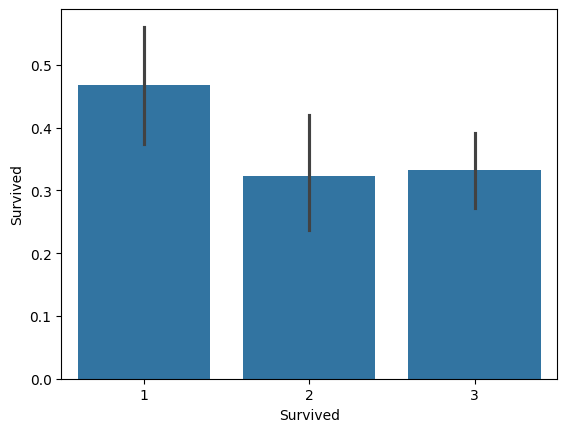

In [168]:
sns.barplot(data,x='Pclass',y='Survived')
plt.xlabel('Survived')
##passengers in first class survived than that of 2nd and 3 rd

<Axes: xlabel='Embarked', ylabel='Survived'>

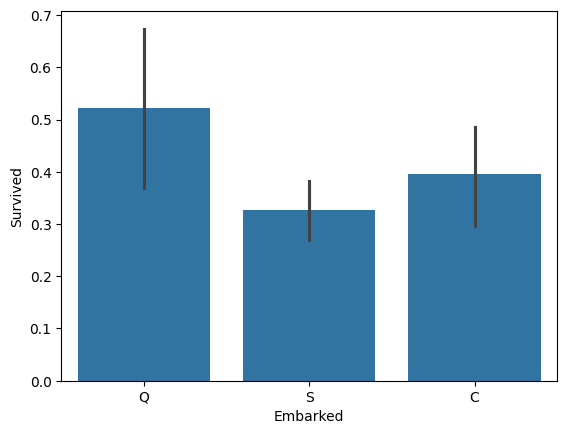

In [169]:
sns.barplot(data,x='Embarked',y='Survived')
#passengers in queenstown survived more than that of other places

<Axes: xlabel='Embarked', ylabel='Pclass'>

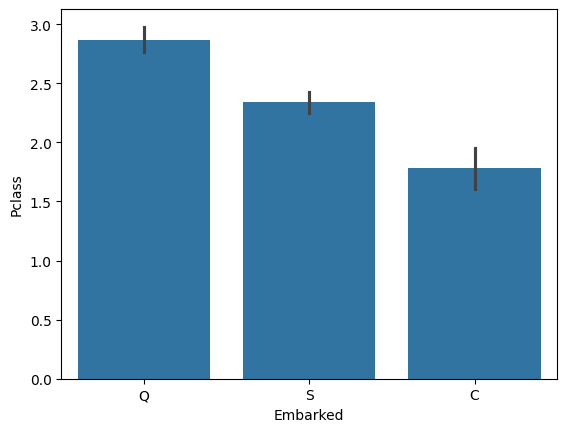

In [170]:
sns.barplot(data,x='Embarked',y='Pclass')
#people of queenstoen is more in three diff class 

<Axes: xlabel='Embarked', ylabel='Survived'>

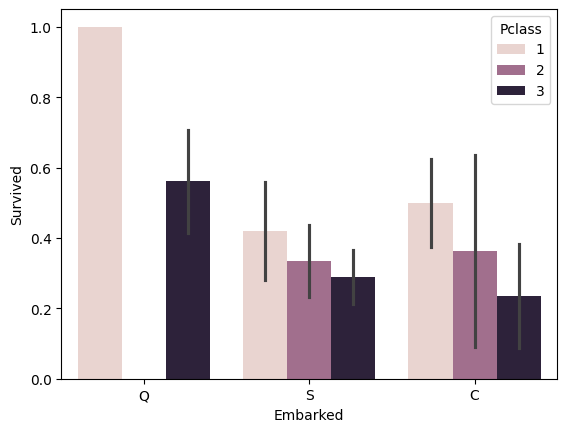

In [171]:

sns.barplot(data,x="Embarked",y="Survived",hue="Pclass")
##passengers in queentown in first class has more survival rate

<Axes: >

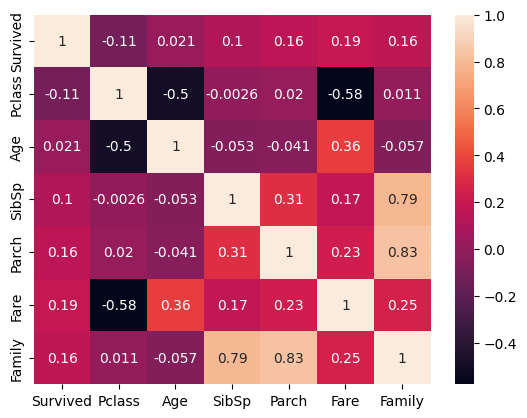

In [172]:
numeric= data.select_dtypes(include='number')
sns.heatmap(numeric.corr(),annot=True)

In [173]:
data=data.drop(['SibSp','Parch','Ticket','Fare'],axis=1)

In [174]:
data

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,male,34.5,Q,1
1,1,3,female,47.0,S,2
2,0,2,male,62.0,Q,1
3,0,3,male,27.0,S,1
4,1,3,female,22.0,S,3
...,...,...,...,...,...,...
413,0,3,male,21.0,S,1
414,1,1,female,39.0,C,1
415,0,3,male,38.5,S,1
416,0,3,male,21.0,S,1


In [175]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder=LabelEncoder()
data['Embarked']=labelencoder.fit_transform(data['Embarked'])
data['Sex']=labelencoder.fit_transform(data['Sex'])

In [177]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
min_max_scaler=MinMaxScaler()
data['Age']=min_max_scaler.fit_transform(data[['Age']])


In [178]:
data

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,1,0.452723,1,1
1,1,3,0,0.617566,2,2
2,0,2,1,0.815377,1,1
3,0,3,1,0.353818,2,1
4,1,3,0,0.287881,2,3
...,...,...,...,...,...,...
413,0,3,1,0.274693,2,1
414,1,1,0,0.512066,0,1
415,0,3,1,0.505473,2,1
416,0,3,1,0.274693,2,1
